In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def k(x1,x2):
    return np.exp(-np.abs(x1-x2))

def K(X1,X2):
    res = np.zeros([len(X1),len(X2)])
    for i1,x1 in enumerate(X1):
        for i2,x2 in enumerate(X2):
            res[i1,i2]=k(x1,x2)
    return res

In [3]:
X = np.linspace(0,10,11)[:,None]

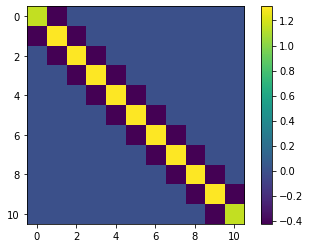

In [4]:
plt.imshow(np.linalg.inv(K(X,X)))
plt.colorbar()

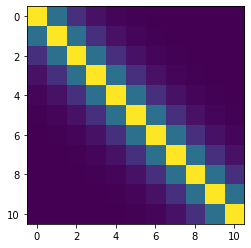

In [5]:
plt.imshow(K(X,X))

In [6]:
def eBL(L,beta=1,s=100):
    return np.linalg.matrix_power(np.eye(L.shape[0])+beta*L/s,s)

In [7]:
#def neweBL(L,beta=1):
#    lam,v = np.linalg.eig(L)
#    v@np.exp(beta*lam)@v.T
#neweBL(L)

In [8]:
def connect(L,N,starti,startj,endi,endj):
    L[starti+startj*N,endi+endj*N]+=1
    L[endi+endj*N,starti+startj*N]+=1
    L[endi+endj*N,endi+endj*N]-=1
    L[starti+startj*N,starti+startj*N]-=1
    

In [63]:
N = 50
L = np.zeros([N*N,N*N])
for i in range(0,N):
    for j in range(0,N):
        connect(L,N,i,j,i-1,j)
        connect(L,N,i,j,i,j-1)

In [64]:
for it in range(10):
    connect(L,N,35,2,30,4)
    connect(L,N,30,4,25,6)
    connect(L,N,25,6,20,10)
    connect(L,N,20,10,15,4)
    connect(L,N,15,4,10,2)

    connect(L,N,35,22,30,24)
    connect(L,N,30,24,25,26)
    connect(L,N,25,26,20,30)
    connect(L,N,20,30,15,24)
    connect(L,N,15,24,10,22)

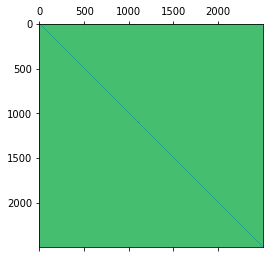

In [65]:
plt.matshow(L)

In [73]:
K = eBL(L,beta=5,s=1000)

In [67]:
predY = np.reshape(K[:,135:136]@np.linalg.inv(K[135:136,135:136])@np.array([[5]]),[N,N])

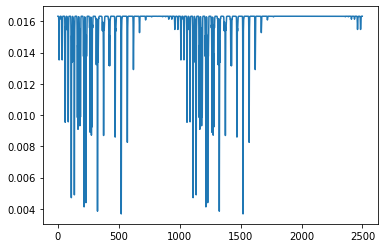

In [68]:
plt.plot(np.diag(K))

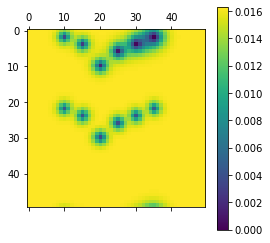

In [74]:
varY = np.reshape(np.diag(K)-np.diag((K[:,135:136]@np.linalg.inv(K[135:136,135:136])@K[135:136,:])),[N,N])
plt.matshow(varY)
plt.colorbar()

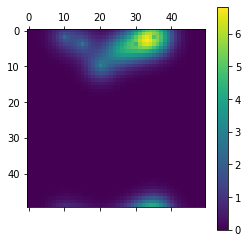

In [70]:
plt.matshow(predY)
plt.colorbar()